## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

In [5]:
"""
Compile 模型
"""
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.SGD(lr=0.01)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 4s 73us/step - loss: 2.0650 - accuracy: 0.2582 - val_loss: 1.9554 - val_accuracy: 0.3005
Epoch 2/500
50000/50000 [==============================] - 4s 71us/step - loss: 1.8858 - accuracy: 0.3390 - val_loss: 1.8675 - val_accuracy: 0.3277
Epoch 3/500
50000/50000 [==============================] - 4s 73us/step - loss: 1.8138 - accuracy: 0.3646 - val_loss: 1.8136 - val_accuracy: 0.3461
Epoch 4/500
50000/50000 [==============================] - 4s 73us/step - loss: 1.7725 - accuracy: 0.3803 - val_loss: 1.7689 - val_accuracy: 0.3756
Epoch 5/500
50000/50000 [==============================] - 4s 71us/step - loss: 1.7333 - accuracy: 0.3940 - val_loss: 1.7575 - val_accuracy: 0.3830
Epoch 6/500
50000/50000 [==============================] - 4s 72us/step - loss: 1.7052 - accuracy: 0.4027 - val_loss: 1.7502 - val_accuracy: 0.3755
Epoch 7/500
50000/50000 [==============================] - 4s 

Epoch 56/500
50000/50000 [==============================] - 4s 70us/step - loss: 1.1976 - accuracy: 0.5815 - val_loss: 1.5869 - val_accuracy: 0.4676
Epoch 57/500
50000/50000 [==============================] - 3s 70us/step - loss: 1.1966 - accuracy: 0.5800 - val_loss: 1.3562 - val_accuracy: 0.5230
Epoch 58/500
50000/50000 [==============================] - 4s 71us/step - loss: 1.1884 - accuracy: 0.5842 - val_loss: 1.4087 - val_accuracy: 0.5018
Epoch 59/500
50000/50000 [==============================] - 3s 70us/step - loss: 1.1754 - accuracy: 0.5878 - val_loss: 1.5792 - val_accuracy: 0.4583
Epoch 60/500
50000/50000 [==============================] - 4s 70us/step - loss: 1.1766 - accuracy: 0.5895 - val_loss: 1.4504 - val_accuracy: 0.4778
Epoch 61/500
50000/50000 [==============================] - 3s 70us/step - loss: 1.1632 - accuracy: 0.5915 - val_loss: 1.3724 - val_accuracy: 0.5102
Epoch 62/500
50000/50000 [==============================] - 4s 70us/step - loss: 1.1587 - accuracy: 0.5972

Epoch 111/500
50000/50000 [==============================] - 4s 74us/step - loss: 0.8946 - accuracy: 0.6907 - val_loss: 1.5264 - val_accuracy: 0.4989
Epoch 112/500
50000/50000 [==============================] - 4s 72us/step - loss: 0.8948 - accuracy: 0.6895 - val_loss: 1.4353 - val_accuracy: 0.5134
Epoch 113/500
50000/50000 [==============================] - 4s 71us/step - loss: 0.8860 - accuracy: 0.6904 - val_loss: 1.4009 - val_accuracy: 0.5293
Epoch 114/500
50000/50000 [==============================] - 4s 73us/step - loss: 0.8841 - accuracy: 0.6938 - val_loss: 1.7638 - val_accuracy: 0.4533
Epoch 115/500
50000/50000 [==============================] - 4s 71us/step - loss: 0.8744 - accuracy: 0.6973 - val_loss: 1.5088 - val_accuracy: 0.5002
Epoch 116/500
50000/50000 [==============================] - 4s 71us/step - loss: 0.8670 - accuracy: 0.7001 - val_loss: 1.5923 - val_accuracy: 0.4775
Epoch 117/500
50000/50000 [==============================] - 4s 71us/step - loss: 0.8668 - accuracy:

50000/50000 [==============================] - 4s 72us/step - loss: 0.6253 - accuracy: 0.7871 - val_loss: 1.5745 - val_accuracy: 0.5259
Epoch 166/500
50000/50000 [==============================] - 4s 81us/step - loss: 0.6226 - accuracy: 0.7880 - val_loss: 1.6741 - val_accuracy: 0.5085
Epoch 167/500
50000/50000 [==============================] - 4s 80us/step - loss: 0.6089 - accuracy: 0.7913 - val_loss: 1.5669 - val_accuracy: 0.5189
Epoch 168/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.6114 - accuracy: 0.7940 - val_loss: 1.7884 - val_accuracy: 0.4764
Epoch 169/500
50000/50000 [==============================] - 4s 71us/step - loss: 0.5975 - accuracy: 0.7968 - val_loss: 1.6317 - val_accuracy: 0.5215
Epoch 170/500
50000/50000 [==============================] - 4s 71us/step - loss: 0.6140 - accuracy: 0.7878 - val_loss: 1.9235 - val_accuracy: 0.4793
Epoch 171/500
50000/50000 [==============================] - 4s 72us/step - loss: 0.5922 - accuracy: 0.8005 - val_

Epoch 220/500
50000/50000 [==============================] - 4s 74us/step - loss: 0.3654 - accuracy: 0.8808 - val_loss: 2.3540 - val_accuracy: 0.4722
Epoch 221/500
50000/50000 [==============================] - 4s 74us/step - loss: 0.3771 - accuracy: 0.8791 - val_loss: 1.9124 - val_accuracy: 0.5107
Epoch 222/500
50000/50000 [==============================] - 4s 74us/step - loss: 0.3654 - accuracy: 0.8833 - val_loss: 1.7622 - val_accuracy: 0.5321
Epoch 223/500
50000/50000 [==============================] - 4s 73us/step - loss: 0.3586 - accuracy: 0.8870 - val_loss: 1.8451 - val_accuracy: 0.5271
Epoch 224/500
50000/50000 [==============================] - 4s 78us/step - loss: 0.4406 - accuracy: 0.8638 - val_loss: 2.0293 - val_accuracy: 0.5033
Epoch 225/500
50000/50000 [==============================] - 4s 75us/step - loss: 0.3690 - accuracy: 0.8824 - val_loss: 1.7498 - val_accuracy: 0.5310
Epoch 226/500
50000/50000 [==============================] - 4s 73us/step - loss: 0.3600 - accuracy:

50000/50000 [==============================] - 4s 73us/step - loss: 0.2429 - accuracy: 0.9303 - val_loss: 2.2129 - val_accuracy: 0.5027
Epoch 275/500
50000/50000 [==============================] - 4s 72us/step - loss: 0.1615 - accuracy: 0.9577 - val_loss: 2.1239 - val_accuracy: 0.5403
Epoch 276/500
50000/50000 [==============================] - 4s 72us/step - loss: 0.1702 - accuracy: 0.9551 - val_loss: 2.2355 - val_accuracy: 0.5257
Epoch 277/500
50000/50000 [==============================] - 4s 75us/step - loss: 0.1484 - accuracy: 0.9620 - val_loss: 2.3353 - val_accuracy: 0.5138
Epoch 278/500
50000/50000 [==============================] - 4s 72us/step - loss: 0.2728 - accuracy: 0.9262 - val_loss: 2.6121 - val_accuracy: 0.4756
Epoch 279/500
50000/50000 [==============================] - 4s 75us/step - loss: 0.1783 - accuracy: 0.9525 - val_loss: 2.1460 - val_accuracy: 0.5388
Epoch 280/500
50000/50000 [==============================] - 4s 75us/step - loss: 0.2357 - accuracy: 0.9384 - val_

Epoch 329/500
50000/50000 [==============================] - 4s 70us/step - loss: 0.0476 - accuracy: 0.9938 - val_loss: 2.4713 - val_accuracy: 0.5381
Epoch 330/500
50000/50000 [==============================] - 4s 70us/step - loss: 0.0448 - accuracy: 0.9947 - val_loss: 2.5314 - val_accuracy: 0.5391
Epoch 331/500
50000/50000 [==============================] - 4s 70us/step - loss: 0.1597 - accuracy: 0.9659 - val_loss: 2.4174 - val_accuracy: 0.5366
Epoch 332/500
50000/50000 [==============================] - 4s 70us/step - loss: 0.0491 - accuracy: 0.9940 - val_loss: 2.4799 - val_accuracy: 0.5417
Epoch 333/500
50000/50000 [==============================] - 4s 71us/step - loss: 0.0436 - accuracy: 0.9950 - val_loss: 2.5286 - val_accuracy: 0.5416
Epoch 334/500
50000/50000 [==============================] - 4s 71us/step - loss: 0.0419 - accuracy: 0.9952 - val_loss: 2.5416 - val_accuracy: 0.5387
Epoch 335/500
50000/50000 [==============================] - 4s 71us/step - loss: 0.0423 - accuracy:

50000/50000 [==============================] - 4s 71us/step - loss: 0.0351 - accuracy: 0.9975 - val_loss: 2.6108 - val_accuracy: 0.5384
Epoch 384/500
50000/50000 [==============================] - 4s 71us/step - loss: 0.0330 - accuracy: 0.9976 - val_loss: 2.6806 - val_accuracy: 0.5334
Epoch 385/500
50000/50000 [==============================] - 4s 71us/step - loss: 0.0319 - accuracy: 0.9978 - val_loss: 2.7539 - val_accuracy: 0.5256
Epoch 386/500
50000/50000 [==============================] - 4s 72us/step - loss: 0.2335 - accuracy: 0.9463 - val_loss: 2.6385 - val_accuracy: 0.5399
Epoch 387/500
50000/50000 [==============================] - 4s 71us/step - loss: 0.0339 - accuracy: 0.9975 - val_loss: 2.6288 - val_accuracy: 0.5408
Epoch 388/500
50000/50000 [==============================] - 4s 72us/step - loss: 0.0308 - accuracy: 0.9982 - val_loss: 2.6745 - val_accuracy: 0.5377
Epoch 389/500
50000/50000 [==============================] - 4s 71us/step - loss: 0.0290 - accuracy: 0.9983 - val_

Epoch 438/500
50000/50000 [==============================] - 4s 73us/step - loss: 0.0114 - accuracy: 0.9997 - val_loss: 3.0063 - val_accuracy: 0.5418
Epoch 439/500
50000/50000 [==============================] - 4s 71us/step - loss: 0.0110 - accuracy: 0.9999 - val_loss: 3.0065 - val_accuracy: 0.5409
Epoch 440/500
50000/50000 [==============================] - 4s 72us/step - loss: 0.0110 - accuracy: 0.9998 - val_loss: 3.0148 - val_accuracy: 0.5412
Epoch 441/500
50000/50000 [==============================] - 4s 70us/step - loss: 0.0108 - accuracy: 0.9999 - val_loss: 3.0140 - val_accuracy: 0.5379
Epoch 442/500
50000/50000 [==============================] - 4s 71us/step - loss: 0.0107 - accuracy: 0.9998 - val_loss: 3.0201 - val_accuracy: 0.5373
Epoch 443/500
50000/50000 [==============================] - 4s 71us/step - loss: 0.0110 - accuracy: 0.9998 - val_loss: 3.0126 - val_accuracy: 0.5412
Epoch 444/500
50000/50000 [==============================] - 4s 71us/step - loss: 0.0105 - accuracy:

50000/50000 [==============================] - 4s 71us/step - loss: 0.0090 - accuracy: 1.0000 - val_loss: 3.0982 - val_accuracy: 0.5380
Epoch 493/500
50000/50000 [==============================] - 4s 71us/step - loss: 0.0088 - accuracy: 1.0000 - val_loss: 3.0947 - val_accuracy: 0.5388
Epoch 494/500
50000/50000 [==============================] - 4s 72us/step - loss: 0.0088 - accuracy: 1.0000 - val_loss: 3.1168 - val_accuracy: 0.5387
Epoch 495/500
50000/50000 [==============================] - 4s 72us/step - loss: 0.0087 - accuracy: 1.0000 - val_loss: 3.1075 - val_accuracy: 0.5373
Epoch 496/500
50000/50000 [==============================] - 4s 72us/step - loss: 0.0086 - accuracy: 0.9999 - val_loss: 3.1254 - val_accuracy: 0.5361
Epoch 497/500
50000/50000 [==============================] - 4s 71us/step - loss: 0.0086 - accuracy: 0.9999 - val_loss: 3.1166 - val_accuracy: 0.5365
Epoch 498/500
50000/50000 [==============================] - 4s 72us/step - loss: 0.0084 - accuracy: 1.0000 - val_

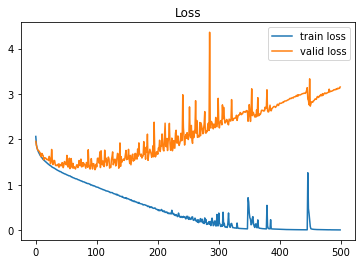

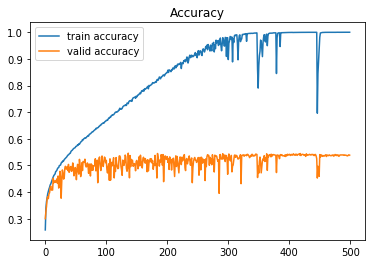

In [8]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()